# Support Vector Machines

## Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.target.shape

(150,)

In [5]:
x = iris.data[:, [0,2]]
y = iris.target

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(135, 15, 135, 15)

In [7]:
linear_svm = svm.SVC(kernel='linear',C=1,gamma='auto').fit(x_train,y_train)
linear_svm

SVC(C=1, gamma='auto', kernel='linear')

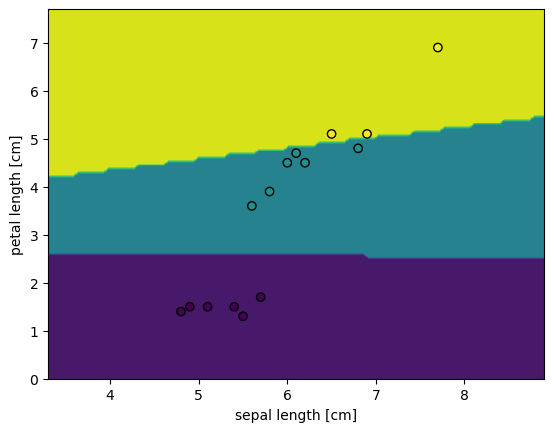

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(linear_svm,x_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k")
# disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k")

In [9]:
y_pred = linear_svm.predict(x_test)
mc = confusion_matrix(y_test, y_pred)
mc

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]], dtype=int64)

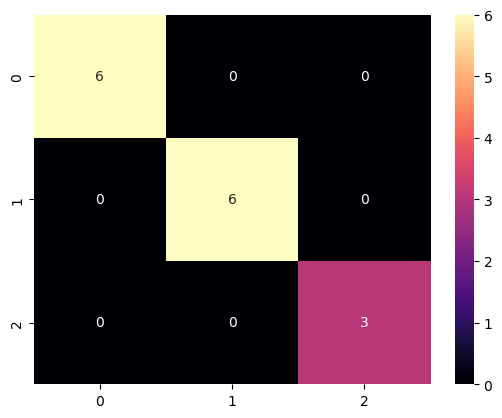

In [10]:
import seaborn as sns

heatmap = sns.heatmap(mc, cmap='magma', annot=True)